## Sales and Profit Analysis

In this analysis, we will explore the relationship between **sales** and **profit** across various products and cities. The goal is to uncover trends, identify products that are underperforming in terms of profitability, and highlight months or cities that are contributing to the overall performance. By visualizing the data, we aim to provide actionable insights that could assist in optimizing pricing, product strategy, and sales planning.

---

## Dataset Overview

The dataset consists of sales data for different products across various cities. It includes the following key columns:

- **Product Name**: The name of the product sold.
- **Sales**: The total sales value for the product.
- **Profit**: The profit generated from the sales of the product.
- **Discount**: The discount offered on the product.
- **City**: The city where the product was sold.
- **Order Date**: The date the order was placed.

The dataset spans several months and contains information about both high-performing and underperforming products.

---

## Data Loading

Before diving into the analysis, we first load the necessary dataset: **Superstore.csv**. This dataset contains sales data for a retail store, including details like sales, profit, order date, and product information.

Let's load the data and inspect the first few rows to understand its structure.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt  
sale_df = pd.read_csv(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Superstore.csv', encoding='latin1')
sale_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


---

## 1. Top 10 Products by Sales Analysis

This code identifies the top 10 products with the highest total sales. The goal is to highlight the best-performing products using a clear bar chart with annotated sales figures.

### Objectives:
- Identify the top 10 products by total sales.
- Present the findings in a clear and visually appealing bar chart.
- Highlight exact sales figures for better insight.

### Code:
The following code accomplishes the objectives:
- Groups the sales data by product.
- Sorts and selects the top 10 products.
- Plots a bar chart using Matplotlib with annotations for clarity.
- Saves the visualization for presentation purposes.


Top 10 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


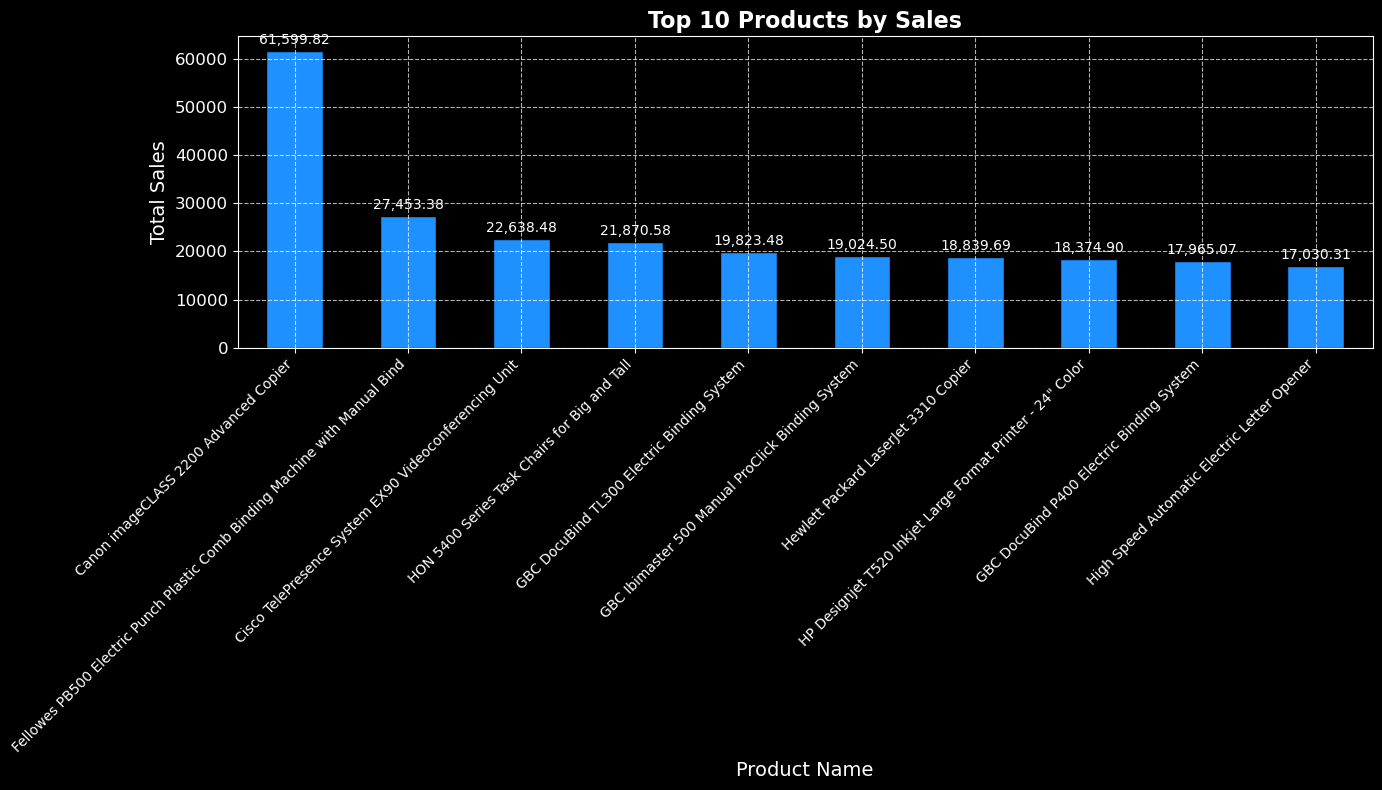

Insight: The bar chart shows the top-performing products by sales, which can help businesses focus on their best-sellers.


In [66]:
# Grouping data by Product Name and calculating total sales
top_products = sale_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Display the top 10 products
print("Top 10 Products by Sales:")
print(top_products)

# Plot customization
plt.style.use('dark_background')
plt.figure(figsize=(14, 8))
ax = top_products.plot(kind='bar', color='#1E90FF', edgecolor='black')

# Adding title and axis labels
plt.title('Top 10 Products by Sales', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotating and aligning x-axis labels
ax.set_xticklabels(top_products.index, rotation=45, fontsize=10, ha='right')

# Adding annotations to display exact sales values
for i, value in enumerate(top_products):
    ax.annotate(f'{value:,.2f}', xy=(i, value), xytext=(0, 5), 
                textcoords='offset points', ha='center', fontsize=10, color='white')

# Customizing y-axis tick labels
plt.yticks(fontsize=12)

# Ensuring layout fits well
plt.tight_layout()

# Save the plot for portfolio
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\top_10_products_sales1.png', dpi=300)

# Display the plot
plt.show()

# Insight
print("Insight: The bar chart shows the top-performing products by sales, which can help businesses focus on their best-sellers.")


### Results and Insights

- The bar chart above shows the top 10 products ranked by total sales.
- Each bar is annotated with the exact sales figure, making the chart easy to interpret.
- **Key Insight:** These products contribute the most to total revenue, which can guide business decisions like stock prioritization or targeted promotions.

### File Saved:
The visualization has been saved as `top_10_products_sales.png` for use in reports or presentations.

---

## 2. Most Profitable Sub-Categories Analysis

This analysis identifies the sub-categories that generate the highest profit. The goal is to visualize the profit distribution across sub-categories to help businesses focus on their most profitable areas.
### Objectives:
- Identify the sub-categories with the highest total profit.
- Present the findings in a clear and visually appealing bar chart.
- Highlight the sub-categories with the highest profits for better business insights.

### Code:
The following code accomplishes the objectives:
- Groups the sales data by sub-category.
- Sorts and selects the sub-categories with the highest profits.
- Plots a bar chart using Matplotlib with annotations for clarity.
- Displays the visualization for immediate insights.



Most Profitable Sub-Categories:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


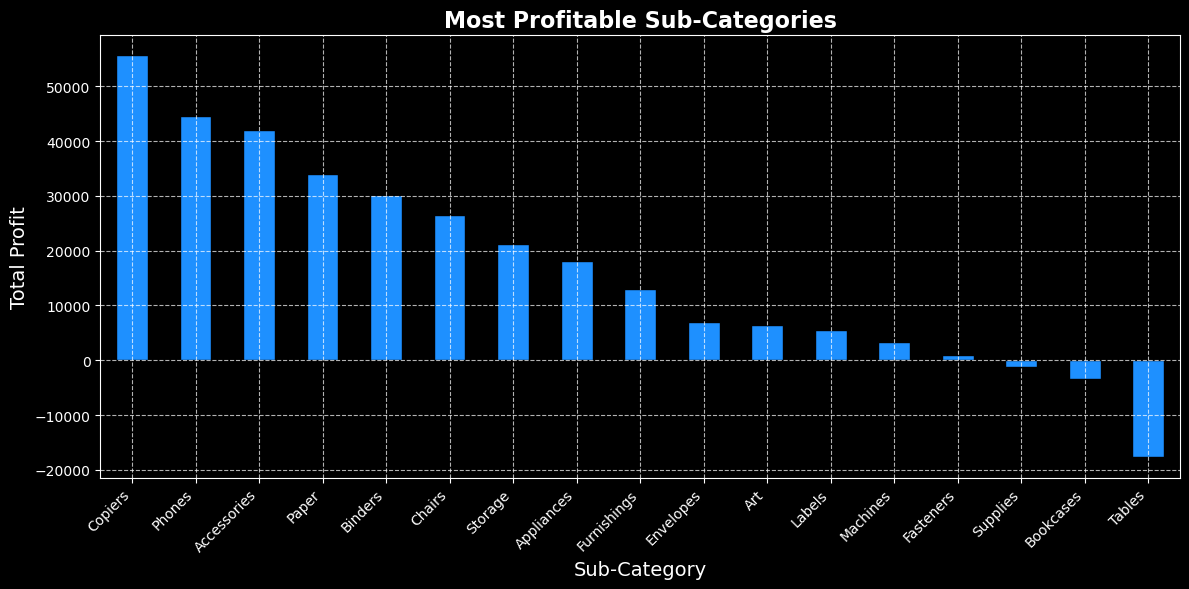

Insight: The bar chart highlights the sub-categories with the highest profits, providing a clear focus for strategic decision-making.


In [67]:
# Grouping data by Sub-Category and calculating total profit
profitable_category = sale_df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Display the most profitable sub-categories
print("Most Profitable Sub-Categories:")
print(profitable_category)

# Plotting the profit data for sub-categories
plt.figure(figsize=(12, 6))
profitable_category.plot(kind='bar', color='#1E90FF', edgecolor='black')

# Adding title and axis labels
plt.title('Most Profitable Sub-Categories', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotating x-axis labels for better alignment
plt.xticks(rotation=45, fontsize=10, ha='right')

# Ensuring layout fits well
plt.tight_layout()

# Save the plot for portfolio
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\most_profitable_subcategories.png', dpi=300)

# Displaying the plot
plt.show()

# Insight
print("Insight: The bar chart highlights the sub-categories with the highest profits, providing a clear focus for strategic decision-making.")


### Results and Insights

- The bar chart above shows the total profit for each sub-category, ranked in descending order.
- **Key Insight:** Businesses can prioritize the most profitable sub-categories to maximize their earnings while analyzing lower-performing ones for improvement.

### File Saved:
The visualization has been saved as `most_profitable_subcategories.png` for use in reports or presentations.

### Next Steps:
- Perform a deeper analysis to identify why certain sub-categories are more profitable.
- Combine this with sales data to evaluate the profit margin for each sub-category.

---


## 3. Profit to Sales Ratio Analysis and Outlier Detection

In this analysis, we focus on the **Profit to Sales Ratio**, which reveals how much profit is generated per unit of sales. By calculating this ratio, we can identify products with exceptionally high or low profitability and detect any outliers.

### Objectives:
- Calculate the **Profit to Sales Ratio** for each product.
- Identify outliers using the **IQR method** (Interquartile Range).
- Visualize outliers to understand how they relate to sales figures.
- Display the top 20 and bottom 20 products by Profit Sales Ratio to better understand the most and least profitable items.

### Code:
The following code calculates the Profit Sales Ratio for each product, identifies outliers, and visualizes these outliers in both a scatter plot and a boxplot for better insight.



In [68]:
# Calculate the Profit to Sales Ratio
sale_df['Profit Sales Ratio'] = sale_df.Profit / sale_df.Sales

In [69]:
# Display the top 20 products by Profit Sales Ratio
print("Top 20 Products by Profit Sales Ratio:")
print(sale_df.groupby('Product Name')['Profit Sales Ratio'].mean().sort_values(ascending=False).head(20))

Top 20 Products by Profit Sales Ratio:
Product Name
Tops Green Bar Computer Printout Paper                                                   0.50
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier                    0.50
Southworth Structures Collection                                                         0.50
Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book    0.50
Xerox 1890                                                                               0.50
Avery 475                                                                                0.50
Xerox 1918                                                                               0.49
Avery 5                                                                                  0.49
Xerox 1983                                                                               0.49
Hewlett-Packard Desktjet 6988DT Refurbished Printer                                      0.49
Xerox 19

In [70]:
# Display the bottom 20 products by Profit Sales Ratio
print("\nBottom 20 Products by Profit Sales Ratio:")
print(sale_df.groupby('Product Name')['Profit Sales Ratio'].mean().sort_values(ascending=True).head(20))


Bottom 20 Products by Profit Sales Ratio:
Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac                               -2.750000
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled                       -2.100000
Euro Pro Shark Stick Mini Vacuum                                                               -1.775000
3.6 Cubic Foot Counter Height Office Refrigerator                                              -1.484000
Okidata B401 Printer                                                                           -1.400000
Zebra GK420t Direct Thermal/Thermal Transfer Printer                                           -1.333333
Hoover Commercial Lightweight Upright Vacuum                                                   -1.312500
Kensington 6 Outlet SmartSocket Surge Protector                                                -1.250000
Acco 6 Outlet Guardian Basic Surge Suppressor                                                  -1.160000


Number of outliers detected: 952


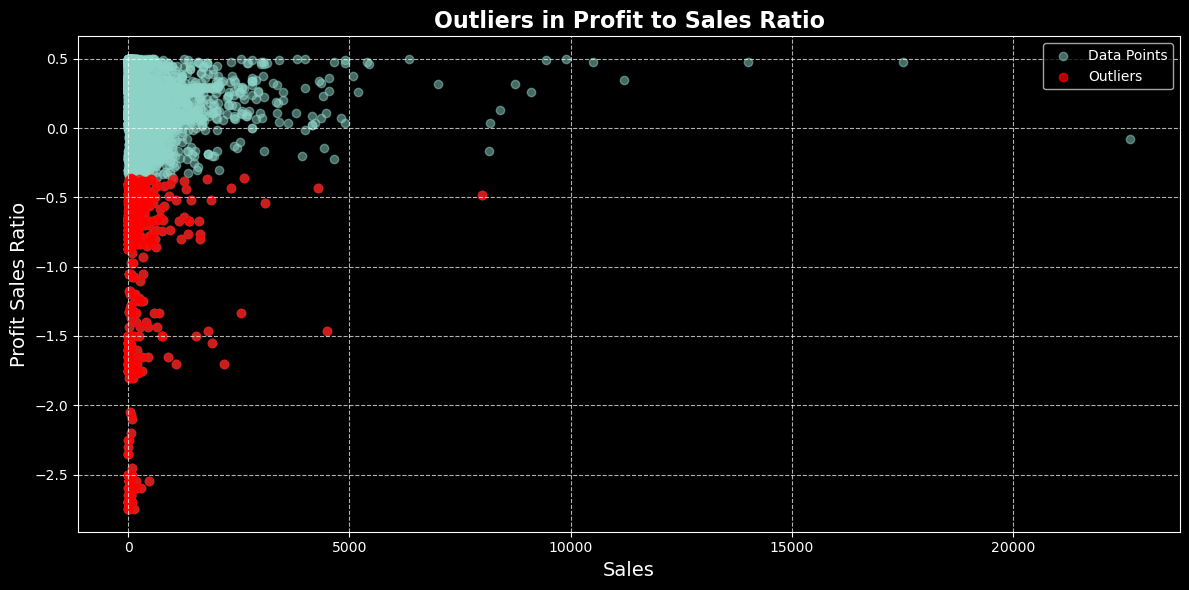

<Figure size 640x480 with 0 Axes>

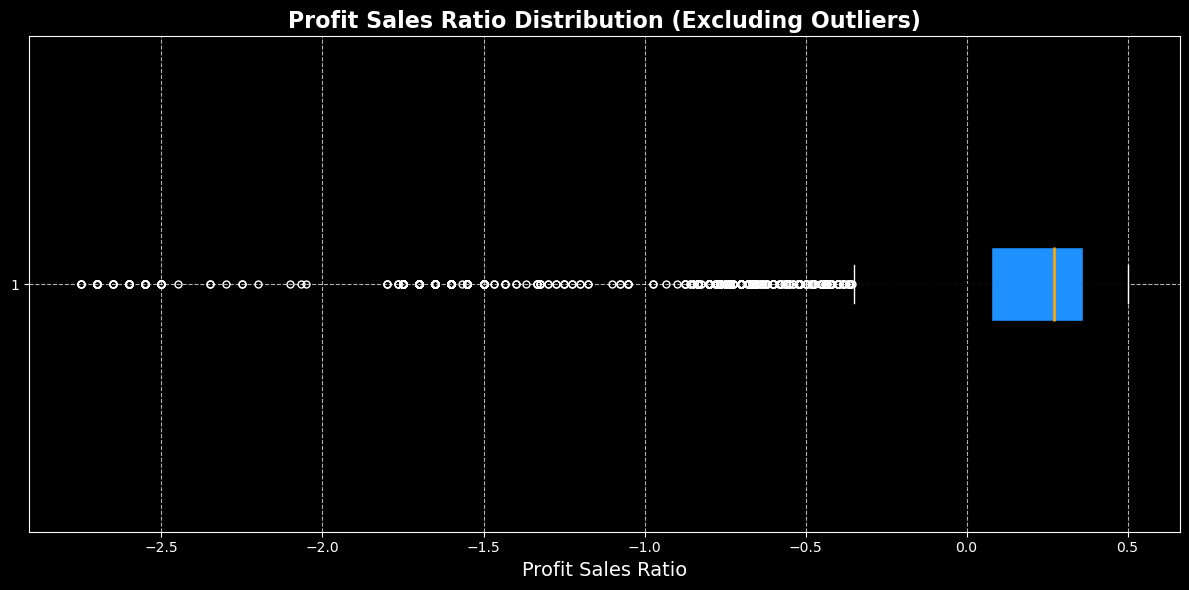

In [71]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = sale_df['Profit Sales Ratio'].quantile(0.25)
Q3 = sale_df['Profit Sales Ratio'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = sale_df[(sale_df['Profit Sales Ratio'] < lower_bound) | (sale_df['Profit Sales Ratio'] > upper_bound)]

# Print the number of outliers detected
print(f"\nNumber of outliers detected: {len(outliers)}")

# Visualize the outliers with a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(sale_df['Sales'], sale_df['Profit Sales Ratio'], label='Data Points', alpha=0.5)
plt.scatter(outliers['Sales'], outliers['Profit Sales Ratio'], color='red', label='Outliers', alpha=0.7)

# Adding title and labels
plt.title('Outliers in Profit to Sales Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit Sales Ratio', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Save the plot for portfolio
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\profit_sales_ratio_outliers.png', dpi=300)

# Boxplot for Profit Sales Ratio distribution
plt.figure(figsize=(12, 6))

# Create the boxplot with horizontal orientation and removed outliers
plt.boxplot(sale_df['Profit Sales Ratio'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#1E90FF', color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(marker='o', color='red', markersize=5),
            medianprops=dict(color='orange', linewidth=2))

# Adding title and labels
plt.title('Profit Sales Ratio Distribution (Excluding Outliers)', fontsize=16, fontweight='bold')
plt.xlabel('Profit Sales Ratio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


### Results and Insights

- **Top 20 Products by Profit Sales Ratio**:
   - The output shows the top 20 products with the highest Profit Sales Ratios, revealing which products are the most profitable relative to sales. 
   - These are the products generating the most profit per unit of sales, and they may represent high-margin or premium products that should be prioritized in marketing and pricing strategies.

- **Bottom 20 Products by Profit Sales Ratio**:
   - The bottom 20 products with the lowest Profit Sales Ratios are also important to analyze. These products have the lowest profit per unit of sales and may indicate low-margin items or products that are not performing well. 
   - These items may require attention, such as re-pricing, reviewing their marketing strategies, or considering discontinuation.

- **Outliers Detected**: 
   - The scatter plot identifies outliers in **Profit to Sales Ratio**. Red dots in the scatter plot represent products with extreme profit margins relative to their sales.
   - **High Outliers**: Products with higher-than-average profit margins. These may be products with unique selling propositions or premium pricing.
   - **Low Outliers**: Products with unusually low profitability, indicating they may require closer evaluation.

- **Boxplot Analysis**:
   - The boxplot shows the distribution of the Profit Sales Ratio across all products. The red dots in the boxplot represent outliers, highlighting products that fall outside of the typical profitability range.
   - The boxplot also reveals the interquartile range, helping to visualize how most products compare in terms of profitability.

- **Number of Outliers Detected**:
   - The number of outliers detected in the dataset is printed, which can help gauge how extreme the outliers are compared to the rest of the data.

### File Saved:
The visualization has been saved as `profit_sales_ratio_outliers.png` for use in reports or presentations.

### Actionable Next Steps:
1. **Analyze High Profit Outliers**: Investigate the high-profit outliers to understand the factors contributing to their success, such as unique features, pricing, or demand.
2. **Review Low Profit Outliers**: Investigate the low-profit outliers to identify potential issues and determine if they need pricing adjustments, marketing strategies, or other improvements.
3. **Adjust Pricing and Marketing Strategies**: Based on insights from the high and low profit products, consider refining your pricing strategy, promotional activities, or even considering which low-profit products may need to be removed from your offerings.
4. **Optimize Product Portfolio**: Based on this analysis, optimize the product portfolio by focusing on high-profit products and reworking or discontinuing low-profit products.

By analyzing both the top and bottom performers in terms of profit-to-sales ratios, and by detecting outliers, you can make data-driven decisions to enhance profitability and refine your product strategy.

---

## 4. Monthly Sales Trend Analysis

In this analysis, we examine the total sales over time by grouping the data by **month**. This helps us identify any trends, seasonality, and fluctuations in sales throughout the year.

### Objectives:
- Convert the 'Order Date' column to a proper DateTime format.
- Group the sales data by month to analyze sales trends over time.
- Visualize monthly sales to identify trends and seasonal patterns.

### Code:
The code below groups sales by month and visualizes the sales over time using a line plot.


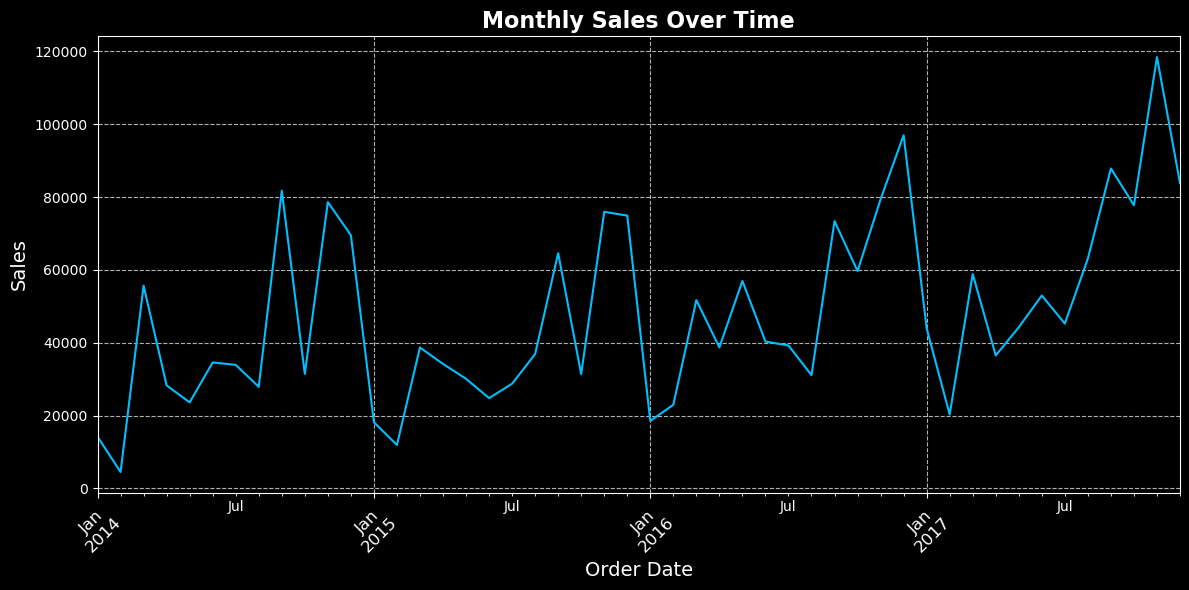

In [72]:
# Convert 'Order Date' to datetime format
sale_df['Order Date'] = pd.to_datetime(sale_df['Order Date'])

# Group sales data by month
sale_per_month = sale_df.groupby(sale_df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
sale_per_month.plot(color='#00BFFF')

# Adding title and labels
plt.title('Monthly Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjusting X-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Save the plot for portfolio
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\monthly_sales_over_time.png', dpi=300)

# Display the plot with tight layout
plt.tight_layout()
plt.show()


### Results and Insights

- The plot shows the **monthly sales** over time, helping to identify patterns, growth, or declines in sales performance.
- **Seasonality**: By analyzing the plot, you can identify whether there are any seasonal trends where sales increase or decrease during certain months.
- **Fluctuations**: The plot might highlight months with unusually high or low sales, which could suggest anomalies, special promotions, or other external factors influencing sales.

### File Saved:
The visualization has been saved as `monthly_sales_over_time.png` for use in reports or presentations.

### Actionable Next Steps:
1. **Seasonality Analysis**: If specific months show higher sales, consider replicating the strategies from those months to boost sales in lower-performing periods.
2. **Anomaly Investigation**: Investigate months with unexpected drops or spikes in sales. These could be due to external factors such as market conditions, promotions, or inventory issues.
3. **Forecasting**: Use this monthly data to forecast future sales and plan inventory, marketing, and promotions accordingly.

This analysis helps in understanding the overall performance and allows for informed decisions on how to optimize sales strategies based on seasonal trends and past performance.

---

## 5. Monthly Sales Comparison with Highlighted Lowest Month

In this analysis, we examine the total sales for each month and highlight **February** as the month with the **lowest sales**. This helps us quickly identify trends and assess the factors that might have contributed to February's poor performance.

### Objectives:
- Convert the monthly sales data into a DataFrame for easier manipulation.
- Add a 'Month' column for better understanding of the data.
- Identify the lowest-selling month and highlight it in the visualization to focus on potential reasons for underperformance.

### Code:
The code below processes the monthly sales data, highlights February (the lowest-selling month), and visualizes it for comparison with other months.



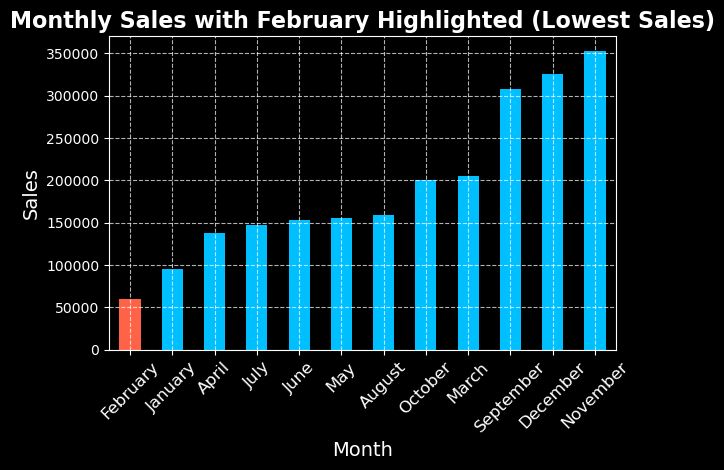

In [73]:
# Convert sale_per_month to DataFrame and add 'Month' column
sale_per_month = sale_per_month.to_frame()
sale_per_month['Month'] = sale_per_month.index.strftime('%B')

# Group sales by Month and sort
month_specific_sale = sale_per_month.groupby('Month')['Sales'].sum().sort_values()

# Highlight February (lowest-selling month) with a different color
colors = ['#00BFFF' if month != 'February' else '#FF6347' for month in month_specific_sale.index]

# Plot the bar chart with the highlighted color for February
month_specific_sale.plot(kind='bar', color=colors)

# Adding title and labels
plt.title('Monthly Sales with February Highlighted (Lowest Sales)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Save the plot for portfolio
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\monthly_sales_february_highlighted.png', dpi=300)

# Show the plot
plt.show()



### Results and Insights

- The bar chart reveals **February** as the **lowest-selling month** in the dataset, which has been highlighted in **red** for easy identification.
- **Reasons for Low Sales in February**: The reason behind February's underperformance can be explored further. Factors such as:
  - **Seasonality**: February might be a slow month due to lower customer demand.
  - **Promotions/Marketing**: Lack of promotions or marketing efforts in February could have contributed to the drop in sales.
  - **External Factors**: Look into any external factors, such as holidays or economic conditions, that might have affected sales.

### File Saved:
The visualization has been saved as `monthly_sales_february_highlighted.png` for use in reports or presentations. 

### Actionable Next Steps:
1. **Investigate February's Sales Decline**: Analyze the reasons for February's low sales. It could be a seasonal dip or a lack of promotional activities.
2. **Increase Promotions**: If seasonality is the issue, consider running targeted promotions in February to boost sales in the future.
3. **Compare With Other Years**: Check if the low sales in February are consistent across multiple years to determine if it's a recurring trend.
4. **Plan for Future Months**: If February's low sales are a trend, plan for increased marketing and inventory to address this in future years.
---

## 6. Comparing Average Sales in February vs Other Months Across Cities

This analysis compares the average sales in **February** with other months across different cities. The goal is to identify cities that have a significant drop in sales during February and understand potential reasons for this decline.

### Objectives:
- Separate sales data for February and other months to compare performance.
- Identify cities where February sales are significantly lower than the other months.
- Visualize the average sales for February vs other months for the top 20 cities with the greatest sales difference.

### Code:
The code below calculates the average sales for February and compares it with other months, focusing on identifying cities with significant sales drops in February.


Cities with lower average sales in February compared to other months:
                  Feb Sales  Other Months Sales  Difference
City                                                       
Muskogee           9.835000          851.015000  841.180000
Lafayette         29.160000          833.568000  804.408000
Minneapolis       90.640000          762.722727  672.082727
North Las Vegas   14.560000          652.429467  637.869467
Pleasant Grove    12.144000          354.339000  342.195000
San Antonio       40.440000          381.800842  341.360842
Woodstock          8.850000          283.762500  274.912500
Dover             35.880000          269.010778  233.130778
Providence       299.950000          530.370690  230.420690
Newark            78.912000          305.573065  226.661065
Gilbert          147.165000          365.488000  218.323000
Concord          129.568000          347.094467  217.526467
Louisville         9.432000          220.292393  210.860393
Santa Barbara    356.790000   

<Figure size 1400x800 with 0 Axes>

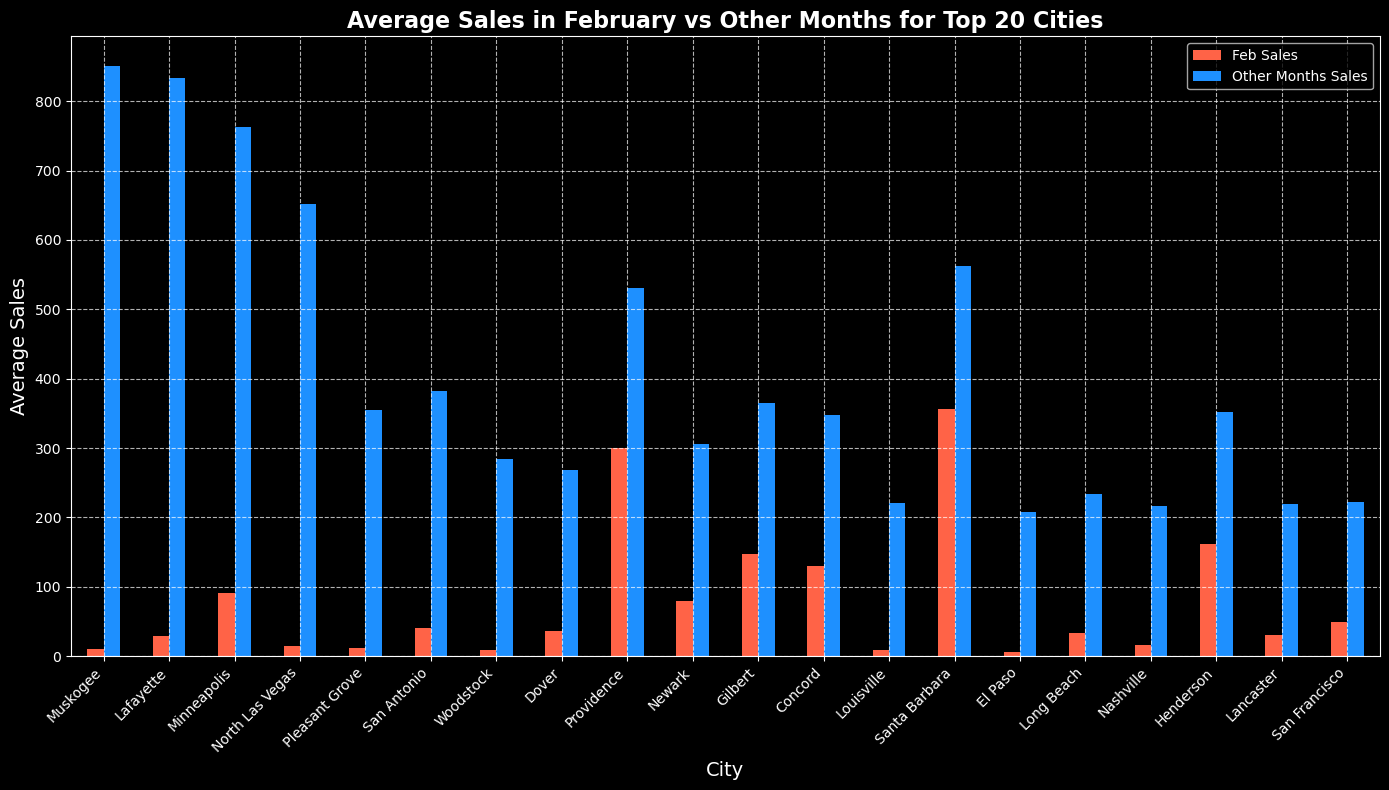

In [74]:
# Extract the month from the 'Order Date' column
sale_df['Month'] = sale_df['Order Date'].dt.month

# Filter the sales data for February and calculate the average sales by city
sales_feb = sale_df[sale_df['Month'] == 2][['City', 'Sales']]
sales_feb = sales_feb.groupby('City')['Sales'].mean()

# Filter the sales data for all other months and calculate the average sales by city
sales_other = sale_df[sale_df['Month'] != 2][['City', 'Sales']]
sales_other = sales_other.groupby('City')['Sales'].mean()

# Merge the February and other months' average sales data on 'City'
sales_feb_vs_other = pd.merge(sales_feb, sales_other, on='City')

# Rename the columns for clarity
sales_feb_vs_other.columns = ['Feb Sales', 'Other Months Sales']

# Calculate the difference between other months' sales and February sales
sales_feb_vs_other['Difference'] = sales_feb_vs_other['Other Months Sales'] - sales_feb_vs_other['Feb Sales']

# Sort the data by the difference in descending order
sales_feb_vs_other = sales_feb_vs_other.sort_values(by='Difference', ascending=False)

# Print cities where the average sales in February are significantly lower compared to other months
print('Cities with lower average sales in February compared to other months:')
print(sales_feb_vs_other[sales_feb_vs_other['Difference'] > sales_feb_vs_other['Difference'].quantile(0.75)])

# Plot the top 20 cities' average sales in February vs other months
plt.figure(figsize=(14, 8))
sales_feb_vs_other[['Feb Sales', 'Other Months Sales']].head(20).plot(kind='bar', figsize=(14, 8), color=['#FF6347', '#1E90FF'])

# Add a title and axis labels to the plot
plt.title('Average Sales in February vs Other Months for Top 20 Cities', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, fontsize=10, ha='right')

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the plot for portfolio 
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\average_sales_feb_vs_other_months.png', dpi=300)
# Display the plot
plt.show()


### Results and Insights

- The analysis identifies the cities where **February** sales are significantly lower than the sales in other months. These cities are crucial for further investigation.
- The **bar chart** compares the average sales in February against the other months for the top 20 cities with the greatest sales difference.
- **Cities with Significant Sales Decline**: The list of cities where February sales are particularly low could indicate a seasonal dip, lack of promotions, or other factors affecting sales during this period.

### File Saved:
The visualization has been saved as `average_sales_feb_vs_other_months.png` for use in reports or presentations.

### Actionable Next Steps:
1. **Investigate Cities with Sales Decline**: Explore why some cities have a significant drop in sales during February. Look into possible external factors, such as local events, holidays, or regional economic conditions.
2. **Targeted Promotions**: Consider running promotions in cities with low sales in February to boost sales in future years.
3. **Adjust Marketing Strategy**: If specific cities are affected, tailor marketing and inventory strategies to address their needs and improve sales in February.
---


## 7. Profitability Analysis: High Sales vs Low Profit, Low Sales vs High Profit  

In this analysis, we aim to identify products with contrasting sales and profit behaviors, such as **high sales but low profit** and **low sales but high profit**. This can help pinpoint opportunities for cost optimization and marketing focus.  

### Objectives:  
- Calculate thresholds for **high sales** and **low profit** (75th and 25th percentiles, respectively).  
- Identify products that fall into the categories of:  
  - **High Sales but Low Profit.**  
  - **Low Sales but High Profit.**  
- Prioritize these products based on their impact on overall sales or profitability.  
- Visualize the top products with **high sales but low profit** for clarity.  

### Code:  
The code performs the following steps:  
1. **Threshold Calculation**: Determines the cutoff points for high sales and low profit, as well as low sales and high profit.  
2. **Data Filtering**: Segregates the data into the specified categories.  
3. **Sorting**: Sorts the filtered data to focus on the most impactful products.  
4. **Visualization**: Plots the top 15 products with high sales but low profit using a horizontal bar chart for better clarity.  
5. **Save Plot**: Saves the resulting visualization for reporting purposes.  




In [75]:
# Define thresholds for high sales and low profit
high_sales_threshold = sale_df['Sales'].quantile(0.75)
low_profit_threshold = sale_df['Profit'].quantile(0.25)

# Products with high sales but low profit
high_sales_low_profit = sale_df[(sale_df['Sales'] > high_sales_threshold) & (sale_df['Profit'] < low_profit_threshold)]
print("Products with high sales but low profit:")
print(high_sales_low_profit[['Product Name', 'Sales', 'Profit']].sort_values(by='Sales', ascending=False))

# Define thresholds for low sales and high profit
low_sales_threshold = sale_df['Sales'].quantile(0.25)
high_profit_threshold = sale_df['Profit'].quantile(0.75)

# Products with low sales but high profit
low_sales_high_profit = sale_df[(sale_df['Sales'] < low_sales_threshold) & (sale_df['Profit'] > high_profit_threshold)]
print("\nProducts with low sales but high profit:")
print(low_sales_high_profit[['Product Name', 'Sales', 'Profit']].sort_values(by='Profit', ascending=False))

Products with high sales but low profit:
                                           Product Name      Sales     Profit
2697  Cisco TelePresence System EX90 Videoconferenci...  22638.480 -1811.0784
165           Lexmark MX611dhe Monochrome Laser Printer   8159.952 -1359.9920
683           Cubify CubeX 3D Printer Triple Head Print   7999.980 -3839.9904
1803  Martin Yale Chadless Opener Electric Letter Op...   4663.736 -1049.3406
7772          Cubify CubeX 3D Printer Double Head Print   4499.985 -6599.9780
...                                                 ...        ...        ...
8929               Iceberg OfficeWorks 42" Round Tables    211.372   -45.2940
9790     Global Leather & Oak Executive Chair, Burgundy    211.246   -66.3916
5014  Dexim XPower Skin Super-Thin Power Case for iP...    210.564   -52.6410
3141          GBC DocuBind 300 Electric Binding Machine    210.392  -336.6272
5011                            Bestar Classic Bookcase    209.979  -356.9643

[625 rows x 3 columns]

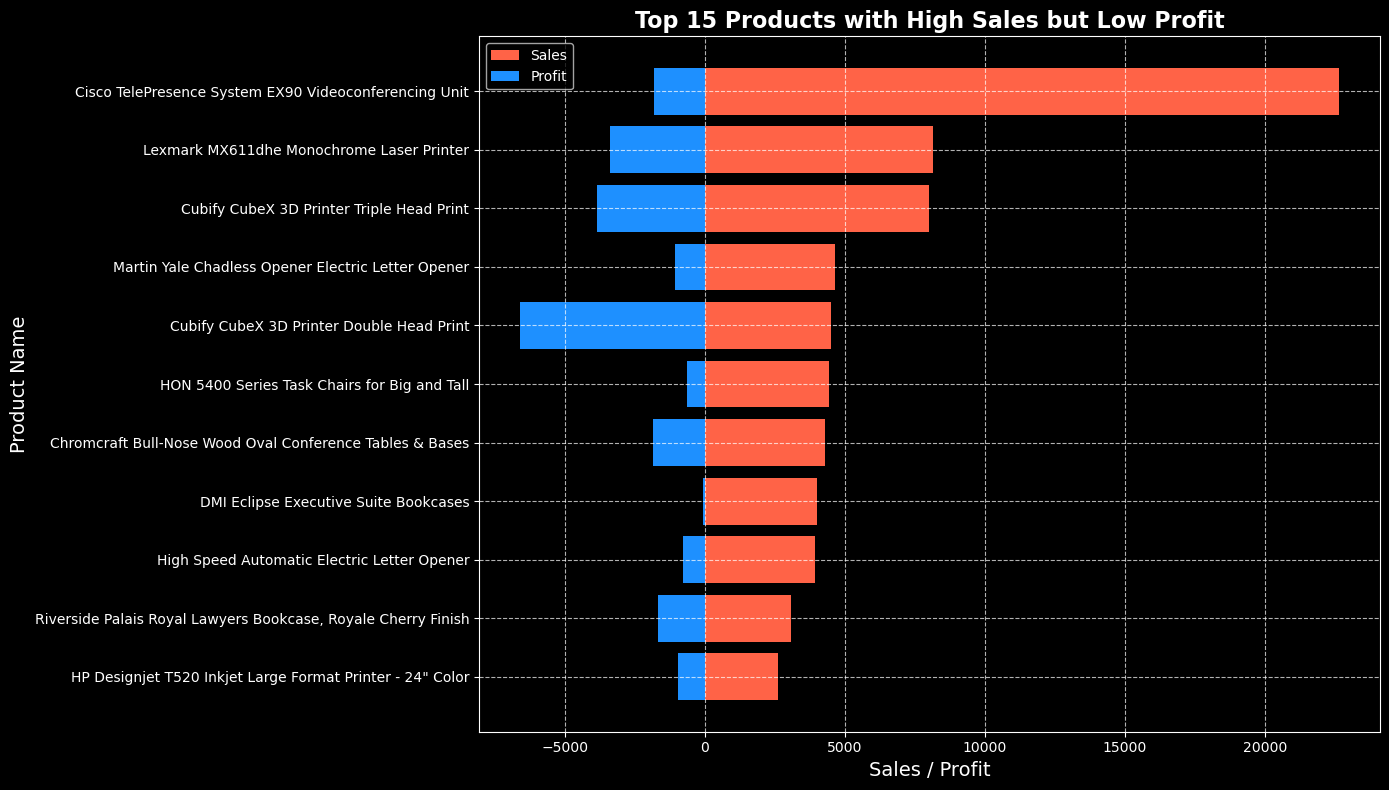

In [76]:
# Sort the data by sales in descending order and select top 15
top_high_sales_low_profit_sorted = high_sales_low_profit.sort_values(by='Sales', ascending=False).head(15)

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.barh(top_high_sales_low_profit_sorted['Product Name'], top_high_sales_low_profit_sorted['Sales'], color='#FF6347', label='Sales')
bars_profit = plt.barh(top_high_sales_low_profit_sorted['Product Name'], top_high_sales_low_profit_sorted['Profit'], color='#1E90FF', label='Profit')

# Adding labels
plt.xlabel('Sales / Profit', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.title('Top 15 Products with High Sales but Low Profit', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # To display the highest sales at the top
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  # Add legend
plt.tight_layout()
# Save the plot for portfolio
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\high_sales_low_profit_products.png', dpi=300)
# Display the plot
plt.show()


### Insights:
- **High Sales, Low Profit**:  
  These products may require better cost management, renegotiation with suppliers, or price adjustments.
- **Low Sales, High Profit**:  
  These products are opportunities for growth and should be promoted to increase sales while maintaining profitability.
### Next Steps:
- **Review High Sales/Low Profit Products**:  
  Examine these products for potential cost-saving or revenue-boosting measures.
- **Promote Low Sales/High Profit Products**:  
  Develop marketing strategies to increase their visibility and demand.
- **Conduct Further Analysis**:  
  Investigate additional factors affecting sales and profitability, such as seasonal trends or customer feedback.
---

## 8. Identifying Products Causing Loss

In this analysis, we aim to identify products that generate **negative profit** (i.e., loss) and analyze their sales. Understanding these products helps pinpoint potential issues like pricing, costs, or inventory mismanagement.

### Objectives:
- Filter products with **negative profit** from the dataset.
- Sort these products by profit in ascending order to identify the largest loss-makers.
- Visualize the **top 15 loss-causing products** to observe the sales and loss patterns.

### Code:
The following code filters the dataset, processes the required data, and creates a horizontal bar chart to compare the sales and profits of the top loss-causing products.



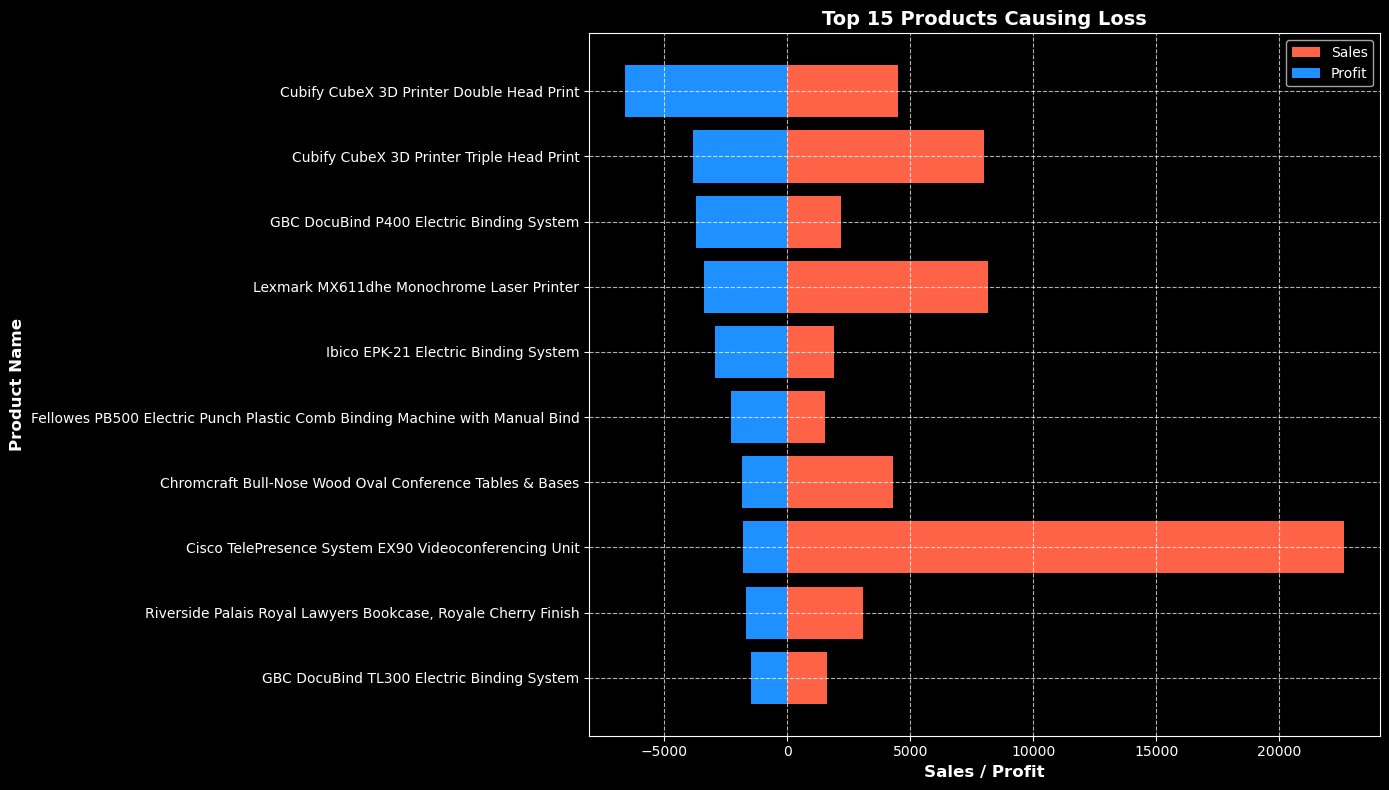

In [77]:
# Filter products with negative profit
loss_product = sale_df[sale_df['Profit'] < 0][['Product Name', 'Sales', 'Profit']].sort_values(by='Profit')

# Visualize the top 15 loss-causing products
plt.figure(figsize=(14, 8))
bars_loss = plt.barh(loss_product['Product Name'].head(15), loss_product['Sales'].head(15), color='#FF6347', label='Sales')
bars_profit = plt.barh(loss_product['Product Name'].head(15), loss_product['Profit'].head(15), color='#1E90FF', label='Profit')

# Adding labels
plt.xlabel('Sales / Profit', fontsize=12, fontweight='bold')
plt.ylabel('Product Name', fontsize=12, fontweight='bold')
plt.title('Top 15 Products Causing Loss', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Display the largest loss products at the top
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()  # Add legend
plt.tight_layout()
# Save the plot for portfolio
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\top_loss_products.png', dpi=300)
plt.show()


## Observations:

1. **Top Loss-Making Products**:
   - The chart highlights the **top 15 products** that cause the most loss.
   - These products have significant sales but result in negative profit, indicating potential inefficiencies or pricing issues.

2. **Sales vs. Profit**:
   - The difference between sales and profit visually emphasizes how large sales volumes do not always translate to profit.

### Next Steps:
- Investigate **pricing strategy** and cost structures for the loss-making products.
- Analyze factors such as **discounting, supplier pricing**, or **customer returns** that might lead to losses.
- Develop strategies to reduce losses, such as renegotiating supplier contracts or adjusting pricing models.


---

## 9. Comparing Total Sales and Profit of Discounted vs Full Price Products

In this analysis, we compare the **total sales** and **total profit** of products sold at a discount versus those sold at full price. This helps assess the impact of discounts on both sales volume and profitability.

### Objectives:
- Separate products into **discounted** and **full price** categories.
- Compare total **sales** and **profit** for both categories.
- Visualize the results to observe how discounts affect sales and profit.

### Code:
The code below processes the data to classify products by their discount status, calculates the total sales and profit for each category, and visualizes the results for comparison.



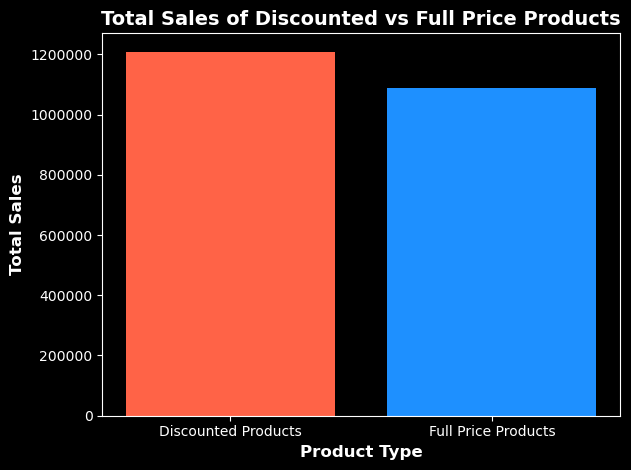

In [78]:
from matplotlib.ticker import ScalarFormatter

# Filter products with discounts and full price products
discounted_products = sale_df[sale_df['Discount'] > 0][['Product Name', 'Sales', 'Profit', 'Discount']].sort_values(by='Discount', ascending=False)
full_price_products = sale_df[sale_df['Discount'] == 0][['Product Name', 'Sales', 'Profit', 'Discount']].sort_values(by='Sales', ascending=False)

# Plot total sales comparison
plt.bar(['Discounted Products', 'Full Price Products'], [discounted_products.Sales.sum(), full_price_products.Sales.sum()], color=['#FF6347', '#1E90FF'])
plt.xlabel('Product Type', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold')
plt.title('Total Sales of Discounted vs Full Price Products', fontsize=14, fontweight='bold')

# Set y-axis to display whole numbers
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()

# Save the plot for future reference
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\sales_comparison_discounted_vs_full_price.png')

plt.show()



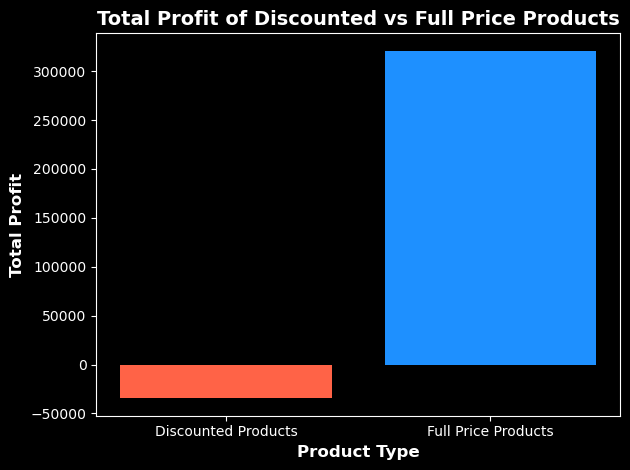

In [79]:
# Plot total profit comparison
plt.bar(['Discounted Products', 'Full Price Products'], [discounted_products.Profit.sum(), full_price_products.Profit.sum()], color=['#FF6347', '#1E90FF'])
plt.xlabel('Product Type', fontsize=12, fontweight='bold')
plt.ylabel('Total Profit', fontsize=12, fontweight='bold')
plt.title('Total Profit of Discounted vs Full Price Products', fontsize=14, fontweight='bold')

# Save the plot for future reference
plt.tight_layout()
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\profit_comparison_discounted_vs_full_price.png')

plt.show()

## Observations:

1. **Total Sales**:
   - The total sales for **discounted products** are higher than for **full price products**. This shows that discounts have a significant effect on boosting sales volume.
   
2. **Total Profit**:
   - Despite higher sales for discounted products, **full price products** generate more overall **profit**. This suggests that while discounts increase volume, they reduce profit margins, making full-price sales more lucrative overall.


### Next Steps:
- Investigate **discount strategies** further to understand their impact on profit margins and identify optimal discount thresholds.
- Consider conducting a **seasonal or targeted discount** analysis to maximize profitability without overselling at low margins.

---

## 10. Comparison of Top 10 Cities by Profit and Sales

In this analysis, we compare the top 10 cities by both **Profit** and **Sales**. Using a dual-axis bar plot, we can visualize both metrics side-by-side, giving us a clearer understanding of how these cities perform in both areas.

### Objectives:
- Identify the top 10 cities by total profit and total sales.
- Display both metrics (Profit and Sales) in a dual-axis bar plot for better comparison.
- Highlight the performance of cities in both categories for targeted decision-making.

### Code:
The following code processes the data to identify the top cities by Profit and Sales, and visualizes them using a dual-axis bar plot. The Profit values are plotted on one axis, and the Sales values on the other.


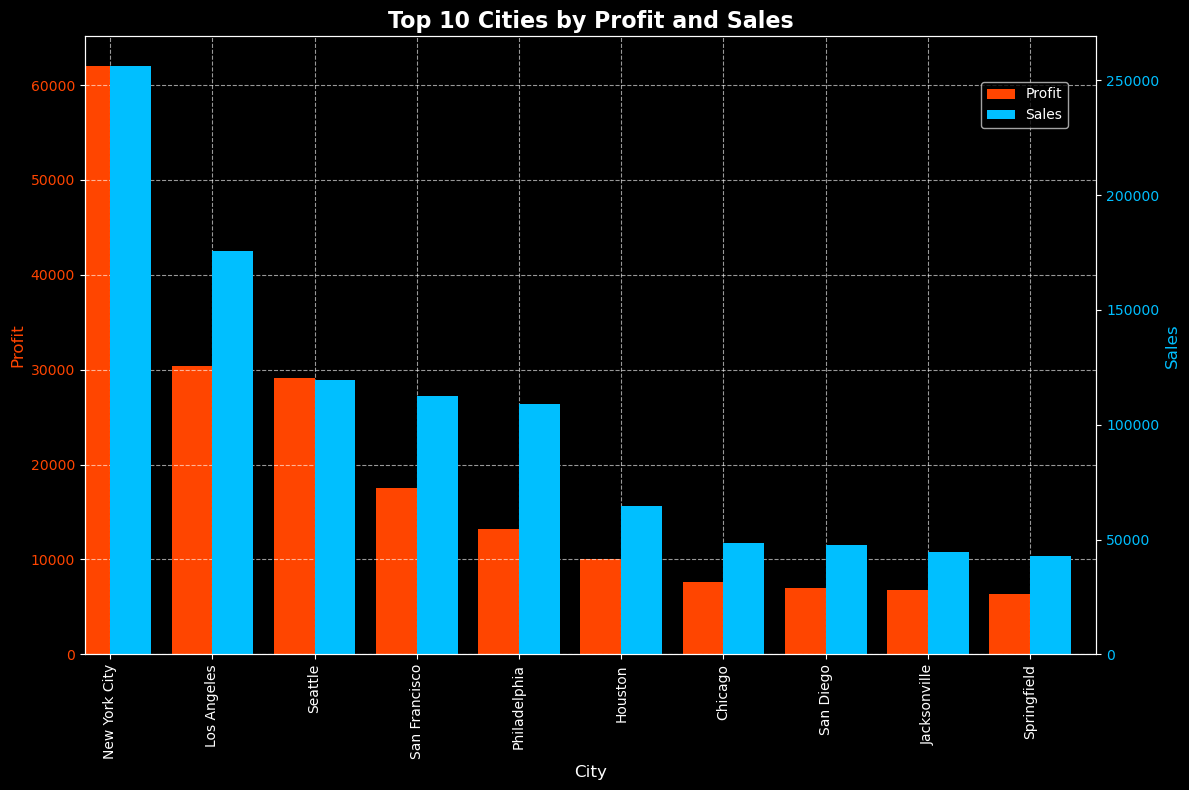

In [80]:
# Grouping by 'City' to calculate total profit and total sales
city_with_highest_profit = sale_df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
city_with_highest_sale = sale_df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Creating a figure with dual axes for Profit and Sales
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

# Plotting Profit and Sales on separate axes
width = 0.4
city_with_highest_profit.plot(kind='bar', color='#FF4500', ax=ax1, position=1, width=width, label='Profit')
city_with_highest_sale.plot(kind='bar', color='#00BFFF', ax=ax2, position=0, width=width, label='Sales')

# Setting labels and tick colors for each axis
ax1.set_xlabel('City', fontsize=12)
ax1.set_ylabel('Profit', color='#FF4500', fontsize=12)
ax2.set_ylabel('Sales', color='#00BFFF', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#FF4500')
ax2.tick_params(axis='y', labelcolor='#00BFFF')

# Adding gridlines and title
ax1.grid(True, linestyle='--', alpha=0.6)
ax2.grid(False)
plt.title('Top 10 Cities by Profit and Sales', fontsize=16, fontweight='bold')

# Adding legend
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Adjusting layout for better spacing
plt.tight_layout()

# Saving the plot for future reference
plt.savefig(r'D:\Codes\Python\Data Sci Projects\Sales Data Analysis\Visualizations\top_10_cities_profit_sales.png')

# Displaying the plot
plt.show()


### Observation and Conclusion:

- **Cities by Profit and Sales**: This analysis highlights the top 10 cities that generate the highest profits and sales. The dual-axis bar plot gives a visual representation, helping to compare both metrics side by side.
- **Key Insights**: 
  - Some cities may have high sales but low profits, which can indicate pricing or cost structure issues.
  - Conversely, cities with lower sales but high profits might be more efficient in terms of cost management and product pricing.
- **Actionable Next Steps**: 
  - For cities with high sales but low profits, further investigation into cost management or discount strategies might be beneficial.
  - For cities with high profits but low sales, marketing and sales strategies could be adjusted to boost revenue while maintaining profitability.

### Save and Share:
The plot has been saved as a PNG file (`top_10_cities_profit_sales.png`) for future reference and sharing.

----

## Conclusion

This analysis has provided valuable insights into the performance of products and sales across different cities and months. By identifying products with high sales but low profit, as well as those causing losses, we can pinpoint areas where pricing, cost management, or marketing strategies need attention.

Additionally, we discovered that certain months, like **February**, exhibited lower sales, which could be due to seasonal trends or other factors. Understanding these patterns offers an opportunity to optimize sales strategies during off-peak periods.

### Key Recommendations:
- **Optimize product pricing and costs** for high-sales but low-profit products.
- **Investigate and adjust strategies for loss-generating products** to improve profitability.
- **Leverage seasonal data** to create targeted campaigns that boost sales during slower months.

By applying these insights and recommendations, businesses can improve overall profitability, make data-driven decisions, and create more efficient sales strategies.


---